# Gamelog

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
colnames=["gamerID", "gameID", "nr.number", "THEpolygon.vertex_count",
          "THEpolygon.position_x", "THEpolygon.position_y", "THEpolygon.color[0]",
          "THEpolygon.color[1]", "THEpolygon.color[2]", "THEpolygon.radius", "seconds"] 
gamelog = pd.read_csv('gamelog.csv', names=colnames, header=None)

In [3]:
gamelog['dif']=gamelog['nr.number']-gamelog['THEpolygon.vertex_count']
gamelog['difAbs'] = gamelog['dif'].abs()
gamelog['correct'] = 0
gamelog.loc[gamelog['dif'] == 0, 'correct'] = 1

In [4]:
gamelog['color_list']= gamelog[['THEpolygon.color[0]','THEpolygon.color[1]','THEpolygon.color[2]']].values.tolist()

In [5]:
conditions = [
    (gamelog['color_list'].map(tuple).isin([(255, 102, 102)])),
    (gamelog['color_list'].map(tuple).isin([(102,255,102)])),
    (gamelog['color_list'].map(tuple).isin([(102,102,255)])),
    (gamelog['color_list'].map(tuple).isin([(255,255,102)])),
    (gamelog['color_list'].map(tuple).isin([(102,255,255)])),
    (gamelog['color_list'].map(tuple).isin([(255,178,102)])),
    (gamelog['color_list'].map(tuple).isin([(255,102,178)])),
    (gamelog['color_list'].map(tuple).isin([(178,102,255)]))]
choices = ['red', 'green', 'blue', 'yellow', 'teal', 'orange', 'pink', 'purple']
gamelog['color'] = np.select(conditions, choices, default='white')

In [6]:
gamelog['delta'] = (gamelog['seconds']-gamelog['seconds'].shift()).fillna(0)
gamelog.loc[gamelog['delta']<=0, 'delta'] = gamelog['seconds']

In [7]:
gamelog

,gamerID,gameID,nr.number,THEpolygon.vertex_count,THEpolygon.position_x,THEpolygon.position_y,THEpolygon.color[0],THEpolygon.color[1],THEpolygon.color[2],THEpolygon.radius,seconds,dif,difAbs,correct,color_list,color,delta
0,2189773,5576994,9,9,269,312,255,255,255,100,2.566,0,0,1,"[255, 255, 255]",white,2.566
1,2189773,5576994,7,6,1761,227,102,102,255,101,5.595,1,1,0,"[102, 102, 255]",blue,3.029
2,2189773,5576994,8,7,1571,789,255,178,102,87,8.770,1,1,0,"[255, 178, 102]",orange,3.175
3,2189773,5576994,8,8,181,200,102,255,102,134,10.159,0,0,1,"[102, 255, 102]",green,1.389
4,2189773,5576994,6,6,1478,589,255,102,178,89,12.424,0,0,1,"[255, 102, 178]",pink,2.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,2558195,8987311,3,3,252,403,255,255,102,57,1141.496,0,0,1,"[255, 255, 102]",yellow,2.150
2031,2558195,8987311,8,9,1564,248,255,102,178,93,1149.321,-1,1,0,"[255, 102, 178]",pink,7.825
2032,2558195,8987311,4,4,1563,350,102,255,102,123,1152.347,0,0,1,"[102, 255, 102]",green,3.026
2033,2558195,8987311,6,6,1413,715,102,102,255,58,1154.384,0,0,1,"[102, 102, 255]",blue,2.037


# Responses

In [8]:
Responses = pd.read_csv('Mindfullness_(Responses).csv')

In [9]:
Responses = Responses.replace('Men', 'male')
Responses = Responses.replace('Not at all', 0)
Responses = Responses.replace('A little', 1)
Responses = Responses.replace('Moderately', 2)
Responses = Responses.replace('Quite a bit', 3)
Responses = Responses.replace('Very much', 4)



In [10]:
for i in range(15):
    Responses.columns.values[i+5] = "S1Q" + str(i)
    Responses.columns.values[i+21] = "S2Q" + str(i)
    Responses["Q" + str(i)] = Responses[Responses.columns.values[i+21]].astype(int)-Responses[Responses.columns.values[i+5]].astype(int)


In [11]:
Responses.select_dtypes(include='number').mean().round(2)

Age                        25.67
S1Q0                        1.67
S1Q1                        1.00
S1Q2                        2.11
S1Q3                        0.89
S1Q4                        1.22
S1Q5                        1.56
S1Q6                        1.00
S1Q7                        1.78
S1Q8                        1.67
S1Q9                        0.89
S1Q10                       2.00
S1Q11                       2.11
S1Q12                       1.78
S1Q13                       1.67
S1Q14                       0.78
Player ID             4297338.22
S2Q0                        1.78
S2Q1                        1.44
S2Q2                        2.67
S2Q3                        1.78
S2Q4                        1.89
S2Q5                        2.56
S2Q6                        1.78
S2Q7                        2.33
S2Q8                        2.44
S2Q9                        1.78
S2Q10                       2.78
S2Q11                       2.44
S2Q12                       1.67
S2Q13     

In [12]:
Responses['S1mean'] = Responses.iloc[:, 5:20].mean(axis=1).round(2)
Responses['S2mean'] = Responses.iloc[:, 21:36].mean(axis=1).round(2)
Responses['Qdif'] = Responses.iloc[:, 37:52].mean(axis=1).round(2)

In [13]:
Responses

,Timestamp,Age,Sex,Do you meditate?,Have you ever had depression or anxiety as a person?,S1Q0,S1Q1,S1Q2,S1Q3,S1Q4,...,Q8,Q9,Q10,Q11,Q12,Q13,Q14,S1mean,S2mean,Qdif
0,22/01/2022 16:48:48,24,male,No,Yes,1,1,0,0,1,...,3,2,2,1,1,3,3,1.40,4.00,2.60
1,22/01/2022 18:05:28,27,female,No,Yes,1,1,4,0,1,...,3,3,1,0,1,1,1,1.80,3.13,1.33
2,22/01/2022 20:02:05,23,male,No,Yes,4,2,4,2,4,...,-1,-3,0,0,-3,-2,-1,2.73,1.27,-1.47
3,22/01/2022 20:51:51,24,male,No,Yes,1,2,1,1,2,...,2,3,2,2,2,0,4,1.53,3.53,2.00
4,22/01/2022 21:16:29,23,female,No,No,1,0,1,0,0,...,1,1,1,2,1,1,0,0.20,0.87,0.67
5,23/01/2022 14:33:24,29,male,No,No,2,1,3,2,1,...,0,0,1,-1,-1,0,1,1.93,2.07,0.13
6,23/01/2022 15:25:59,26,female,No,No,1,0,1,1,1,...,2,3,1,1,1,2,3,0.60,2.07,1.47
7,23/01/2022 15:31:50,26,female,No,Yes,1,1,2,0,0,...,-1,0,-1,-3,0,0,0,0.73,0.53,-0.20
8,24/01/2022 00:32:19,29,female,No,Yes,3,1,3,2,1,...,-2,-1,0,1,-3,-1,-3,2.33,1.20,-1.13


In [14]:
Responses[['Player ID','S1mean','S2mean','Qdif']]

,Player ID,S1mean,S2mean,Qdif
0,5555,1.40,4.00,2.60
1,2189773,1.80,3.13,1.33
2,7226659,2.73,1.27,-1.47
3,1685637,1.53,3.53,2.00
4,6092123,0.20,0.87,0.67
5,9274304,1.93,2.07,0.13
6,8714568,0.60,2.07,1.47
7,929230,0.73,0.53,-0.20
8,2558195,2.33,1.20,-1.13


## Clean data

In [15]:
list(set(gamelog['gamerID'].unique()).intersection(Responses['Player ID'].unique()))

[9274304, 7226659, 1685637, 8714568, 2189773, 929230, 2558195, 6092123]

In [16]:
Responses['Player ID'].unique()

array([   5555, 2189773, 7226659, 1685637, 6092123, 9274304, 8714568,
        929230, 2558195])

In [17]:
gamelog['gamerID'].unique()

array([2189773, 7226659, 4705656, 6092123, 9282881, 9274304, 8714568,
        929230, 1685637, 3592917, 2558195])

In [18]:
gamelog.join(Responses.set_index('Player ID'), on='gamerID')

,gamerID,gameID,nr.number,THEpolygon.vertex_count,THEpolygon.position_x,THEpolygon.position_y,THEpolygon.color[0],THEpolygon.color[1],THEpolygon.color[2],THEpolygon.radius,...,Q8,Q9,Q10,Q11,Q12,Q13,Q14,S1mean,S2mean,Qdif
0,2189773,5576994,9,9,269,312,255,255,255,100,...,3.0,3.0,1.0,0.0,1.0,1.0,1.0,1.80,3.13,1.33
1,2189773,5576994,7,6,1761,227,102,102,255,101,...,3.0,3.0,1.0,0.0,1.0,1.0,1.0,1.80,3.13,1.33
2,2189773,5576994,8,7,1571,789,255,178,102,87,...,3.0,3.0,1.0,0.0,1.0,1.0,1.0,1.80,3.13,1.33
3,2189773,5576994,8,8,181,200,102,255,102,134,...,3.0,3.0,1.0,0.0,1.0,1.0,1.0,1.80,3.13,1.33
4,2189773,5576994,6,6,1478,589,255,102,178,89,...,3.0,3.0,1.0,0.0,1.0,1.0,1.0,1.80,3.13,1.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,2558195,8987311,3,3,252,403,255,255,102,57,...,-2.0,-1.0,0.0,1.0,-3.0,-1.0,-3.0,2.33,1.20,-1.13
2031,2558195,8987311,8,9,1564,248,255,102,178,93,...,-2.0,-1.0,0.0,1.0,-3.0,-1.0,-3.0,2.33,1.20,-1.13
2032,2558195,8987311,4,4,1563,350,102,255,102,123,...,-2.0,-1.0,0.0,1.0,-3.0,-1.0,-3.0,2.33,1.20,-1.13
2033,2558195,8987311,6,6,1413,715,102,102,255,58,...,-2.0,-1.0,0.0,1.0,-3.0,-1.0,-3.0,2.33,1.20,-1.13


In [19]:
cleanLog= gamelog[gamelog['gamerID'].isin(Responses['Player ID'].unique().tolist())]

In [20]:
cleanLog = cleanLog[~cleanLog['gameID'].isin(cleanLog.groupby('gameID')['dif'].value_counts().unstack(fill_value=0)[cleanLog.groupby('gameID')['dif'].value_counts().unstack(fill_value=0)[0]==0].index.tolist())]

In [21]:
cleanLog = cleanLog[~cleanLog['gameID'].isin(cleanLog.groupby('gameID').count()['delta'][cleanLog.groupby('gameID').count()['delta']<3].index.tolist())]

In [22]:
Responses['Player ID'].unique().tolist()

[5555, 2189773, 7226659, 1685637, 6092123, 9274304, 8714568, 929230, 2558195]

<AxesSubplot:>

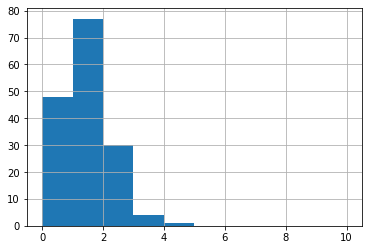

In [23]:
cleanLog.groupby('gameID').max()['dif'].hist(range=[0, 10])

In [24]:
cleanLog

,gamerID,gameID,nr.number,THEpolygon.vertex_count,THEpolygon.position_x,THEpolygon.position_y,THEpolygon.color[0],THEpolygon.color[1],THEpolygon.color[2],THEpolygon.radius,seconds,dif,difAbs,correct,color_list,color,delta
0,2189773,5576994,9,9,269,312,255,255,255,100,2.566,0,0,1,"[255, 255, 255]",white,2.566
1,2189773,5576994,7,6,1761,227,102,102,255,101,5.595,1,1,0,"[102, 102, 255]",blue,3.029
2,2189773,5576994,8,7,1571,789,255,178,102,87,8.770,1,1,0,"[255, 178, 102]",orange,3.175
3,2189773,5576994,8,8,181,200,102,255,102,134,10.159,0,0,1,"[102, 255, 102]",green,1.389
4,2189773,5576994,6,6,1478,589,255,102,178,89,12.424,0,0,1,"[255, 102, 178]",pink,2.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,2558195,8987311,3,3,252,403,255,255,102,57,1141.496,0,0,1,"[255, 255, 102]",yellow,2.150
2031,2558195,8987311,8,9,1564,248,255,102,178,93,1149.321,-1,1,0,"[255, 102, 178]",pink,7.825
2032,2558195,8987311,4,4,1563,350,102,255,102,123,1152.347,0,0,1,"[102, 255, 102]",green,3.026
2033,2558195,8987311,6,6,1413,715,102,102,255,58,1154.384,0,0,1,"[102, 102, 255]",blue,2.037


# Errors distributions

<AxesSubplot:>

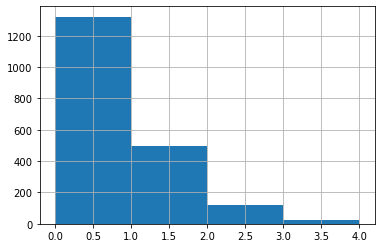

In [25]:
cleanLog['difAbs'].hist(bins =4)

<AxesSubplot:>

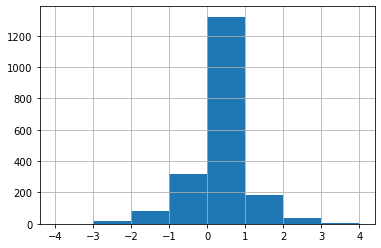

In [26]:
cleanLog['dif'].hist(bins =8)

(array([  0.,   8.,  33., 170.,  23.,   4.,   0.,   0.]),
 array([-3.   , -2.125, -1.25 , -0.375,  0.5  ,  1.375,  2.25 ,  3.125,
         4.   ]),
 <BarContainer object of 8 artists>)

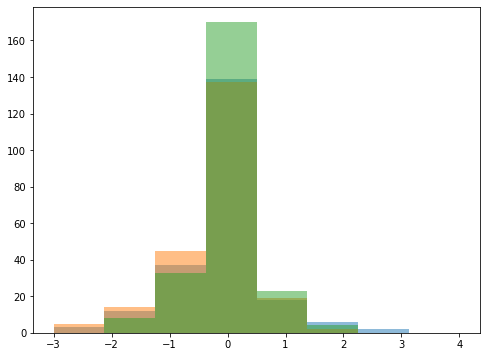

In [27]:
plt.figure(figsize=(8,6))
plt.hist(cleanLog[cleanLog['color']=='red']['dif'], bins=8, alpha=0.5, label="red",range=[-3, 4])
plt.hist(cleanLog[cleanLog['color']=='blue']['dif'], bins=8, alpha=0.5, label="blue",range=[-3, 4])
plt.hist(cleanLog[cleanLog['color']=='green']['dif'], bins=8, alpha=0.5, label="green",range=[-3, 4])

In [28]:
#cleanLog[(cleanLog['color']==c)&(cleanLog['nr.number']==3)]['dif']

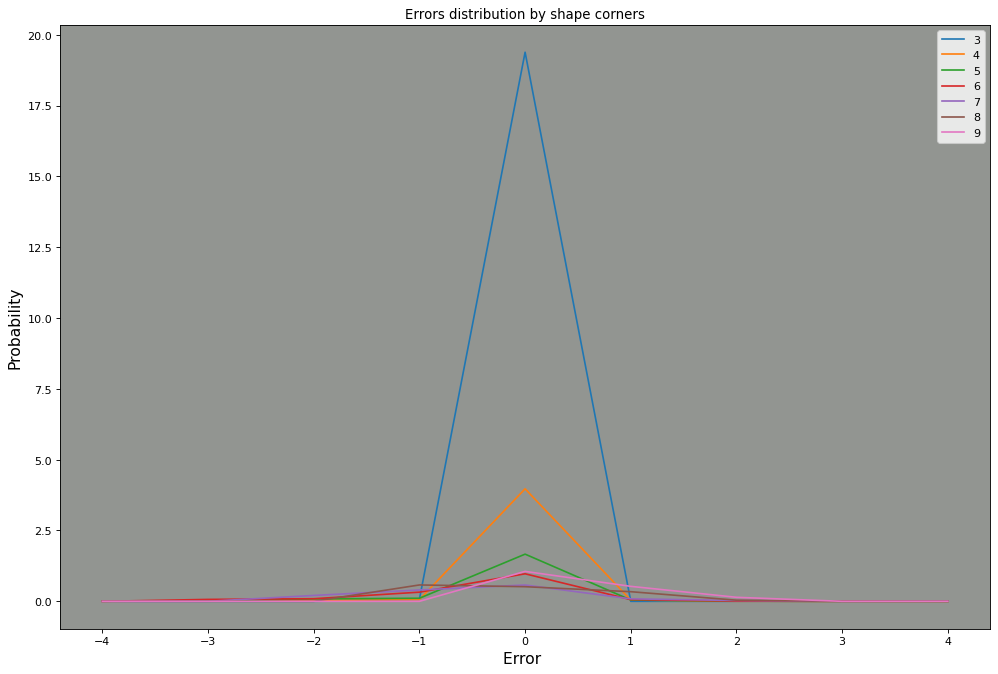

In [29]:
from scipy.stats.kde import gaussian_kde
from numpy import linspace

plt.figure(figsize=(15, 10), dpi=80)
Nlist = cleanLog['THEpolygon.vertex_count'].unique().tolist()
Nlist.sort()
for c in Nlist:
    data = cleanLog[cleanLog['nr.number']==c]['dif']
    kde = gaussian_kde( data )
    dist_space = linspace( -4,4, 9 )
    plt.plot( dist_space, kde(dist_space),  label=c)
    #plt.yscale('log')
    ax = plt.gca()
    ax.set_facecolor('xkcd:grey')
plt.xlabel("Error ", size=14)
plt.ylabel("Probability", size=14)
plt.title("Errors distribution by shape corners")
plt.legend(loc='upper right')
plt.show()

# Games stats

/home/taavi/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


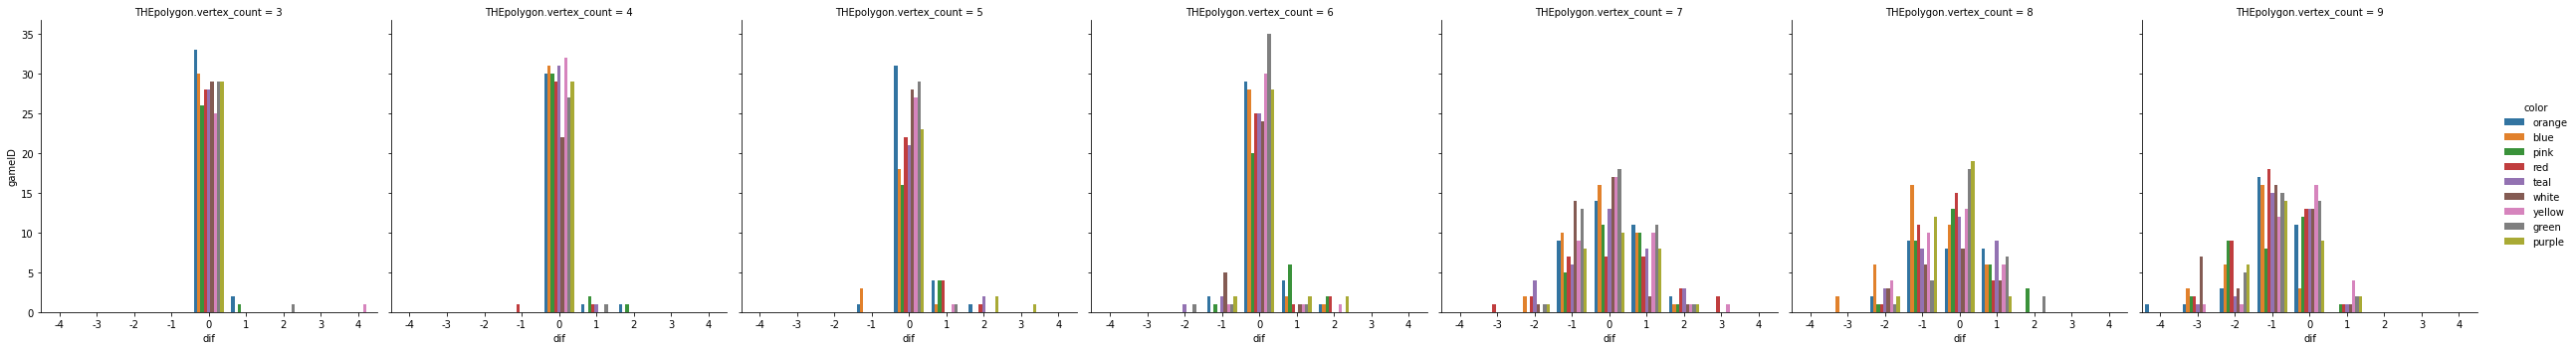

In [30]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

df =  cleanLog.groupby(['dif','color','THEpolygon.vertex_count']).count().reset_index()

sns.factorplot(x="dif", y="gameID", hue="color", col="THEpolygon.vertex_count", data=df, kind="bar")
plt.show()

In [31]:
correctmatrix= cleanLog.groupby(['correct','color','THEpolygon.vertex_count']).agg(count=pd.NamedAgg(column="color", aggfunc="count")).unstack('correct').fillna(0)
correctmatrix['percent']=(correctmatrix[('count',  1)]/(correctmatrix[('count', 0)]+correctmatrix[('count',  1)])).round(2)
correctmatrix2 = correctmatrix['percent'].to_frame().unstack().droplevel(0,1)
correctmatrix2.columns= correctmatrix2.columns.rename('vertex count')
correctmatrix2

vertex count,3,4,5,6,7,8,9
color,,,,,,,
blue,1.00,1.00,0.82,0.90,0.41,0.27,0.11
green,0.97,0.96,0.97,0.92,0.41,0.56,0.39
orange,0.94,0.94,0.84,0.81,0.39,0.30,0.33
pink,0.96,0.91,0.80,0.69,0.41,0.41,0.38
purple,1.00,1.00,0.88,0.82,0.36,0.54,0.29
red,1.00,0.94,0.81,0.89,0.24,0.48,0.30
teal,1.00,0.97,0.91,0.89,0.38,0.38,0.41
white,1.00,1.00,1.00,0.80,0.49,0.38,0.32
yellow,0.96,1.00,0.96,0.91,0.45,0.39,0.47


In [32]:
correctmatrix2.mean(axis=1)

color
blue      0.644286
green     0.740000
orange    0.650000
pink      0.651429
purple    0.698571
red       0.665714
teal      0.705714
white     0.712857
yellow    0.734286
dtype: float64

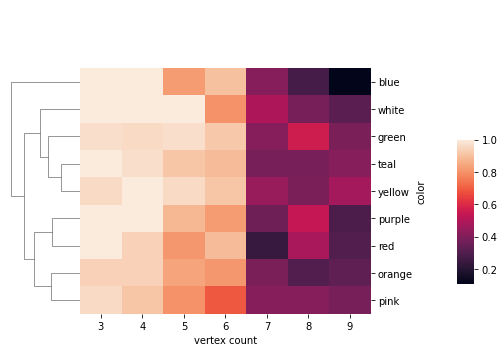

In [33]:
g=sns.clustermap(correctmatrix2,col_cluster=False,method="complete", figsize=(8,5))
g.fig.subplots_adjust(right=0.65)
#g.fig.suptitle('Rate of correct answers depending on color and number of corners')
g.ax_cbar.set_position((0.8, .2, .03, .4))
g.fig.savefig("Correct_answers_matrix.png")

# Players stats

In [34]:
playerStat = cleanLog.groupby('gamerID').agg({'delta':['min','mean', 'median'],
                                 'dif':'mean',
                                 'difAbs':'mean',
                                 'THEpolygon.vertex_count': 'mean',
                                 'correct': ['sum','count',lambda x : x.sum()/x.count()]})
playerStat

delta                          dif    difAbs THEpolygon.vertex_count  \
           min       mean  median      mean      mean                    mean   
gamerID                                                                         
929230   0.118   4.302502  2.1450  0.004651  0.525581                6.181395   
1685637  0.106   1.892901  1.5940 -0.077922  0.363636                6.111688   
2189773  0.630   3.343271  2.0010 -0.046110  0.334294                6.337176   
2558195  1.285  12.885322  3.3400 -0.411111  0.588889                6.055556   
6092123  0.649   2.733988  2.2320 -0.138554  0.481928                5.972892   
7226659  0.630   2.558207  1.4040 -0.236957  0.380435                6.052174   
8714568  1.780  16.544250  5.5485 -0.346154  0.576923                6.096154   
9274304  1.037  13.585634  2.9610 -0.146341  0.317073                6.170732   

        correct                   
            sum count <lambda_0>  
gamerID                           
929230      132   215   0.613953  
1685637     269   385   0.698701  
2189773     248   347   0.714697  
2558195      53    90   0.588889  
6092123     210   332   0.632530  
7226659     314   460   0.682609  
8714568      31    52   0.596154  
9274304      64    82   0.780488

In [35]:
playerStat2 = playerStat.join(Responses.set_index('Player ID'))

/home/taavi/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:9126: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  return merge(


In [36]:
playerStat2.select_dtypes(include='number')

,"(delta, min)","(delta, mean)","(delta, median)","(dif, mean)","(difAbs, mean)","(THEpolygon.vertex_count, mean)","(correct, sum)","(correct, count)","(correct, <lambda_0>)",Age,...,Q8,Q9,Q10,Q11,Q12,Q13,Q14,S1mean,S2mean,Qdif
gamerID,,,,,,,,,,,,,,,,,,,,,
929230,0.118,4.302502,2.1450,0.004651,0.525581,6.181395,132,215,0.613953,26,...,-1,0,-1,-3,0,0,0,0.73,0.53,-0.20
1685637,0.106,1.892901,1.5940,-0.077922,0.363636,6.111688,269,385,0.698701,24,...,2,3,2,2,2,0,4,1.53,3.53,2.00
2189773,0.630,3.343271,2.0010,-0.046110,0.334294,6.337176,248,347,0.714697,27,...,3,3,1,0,1,1,1,1.80,3.13,1.33
2558195,1.285,12.885322,3.3400,-0.411111,0.588889,6.055556,53,90,0.588889,29,...,-2,-1,0,1,-3,-1,-3,2.33,1.20,-1.13
6092123,0.649,2.733988,2.2320,-0.138554,0.481928,5.972892,210,332,0.632530,23,...,1,1,1,2,1,1,0,0.20,0.87,0.67
7226659,0.630,2.558207,1.4040,-0.236957,0.380435,6.052174,314,460,0.682609,23,...,-1,-3,0,0,-3,-2,-1,2.73,1.27,-1.47
8714568,1.780,16.544250,5.5485,-0.346154,0.576923,6.096154,31,52,0.596154,26,...,2,3,1,1,1,2,3,0.60,2.07,1.47
9274304,1.037,13.585634,2.9610,-0.146341,0.317073,6.170732,64,82,0.780488,29,...,0,0,1,-1,-1,0,1,1.93,2.07,0.13


In [37]:
playerStat2['Sex'].value_counts()

female    5
male      3
Name: Sex, dtype: int64

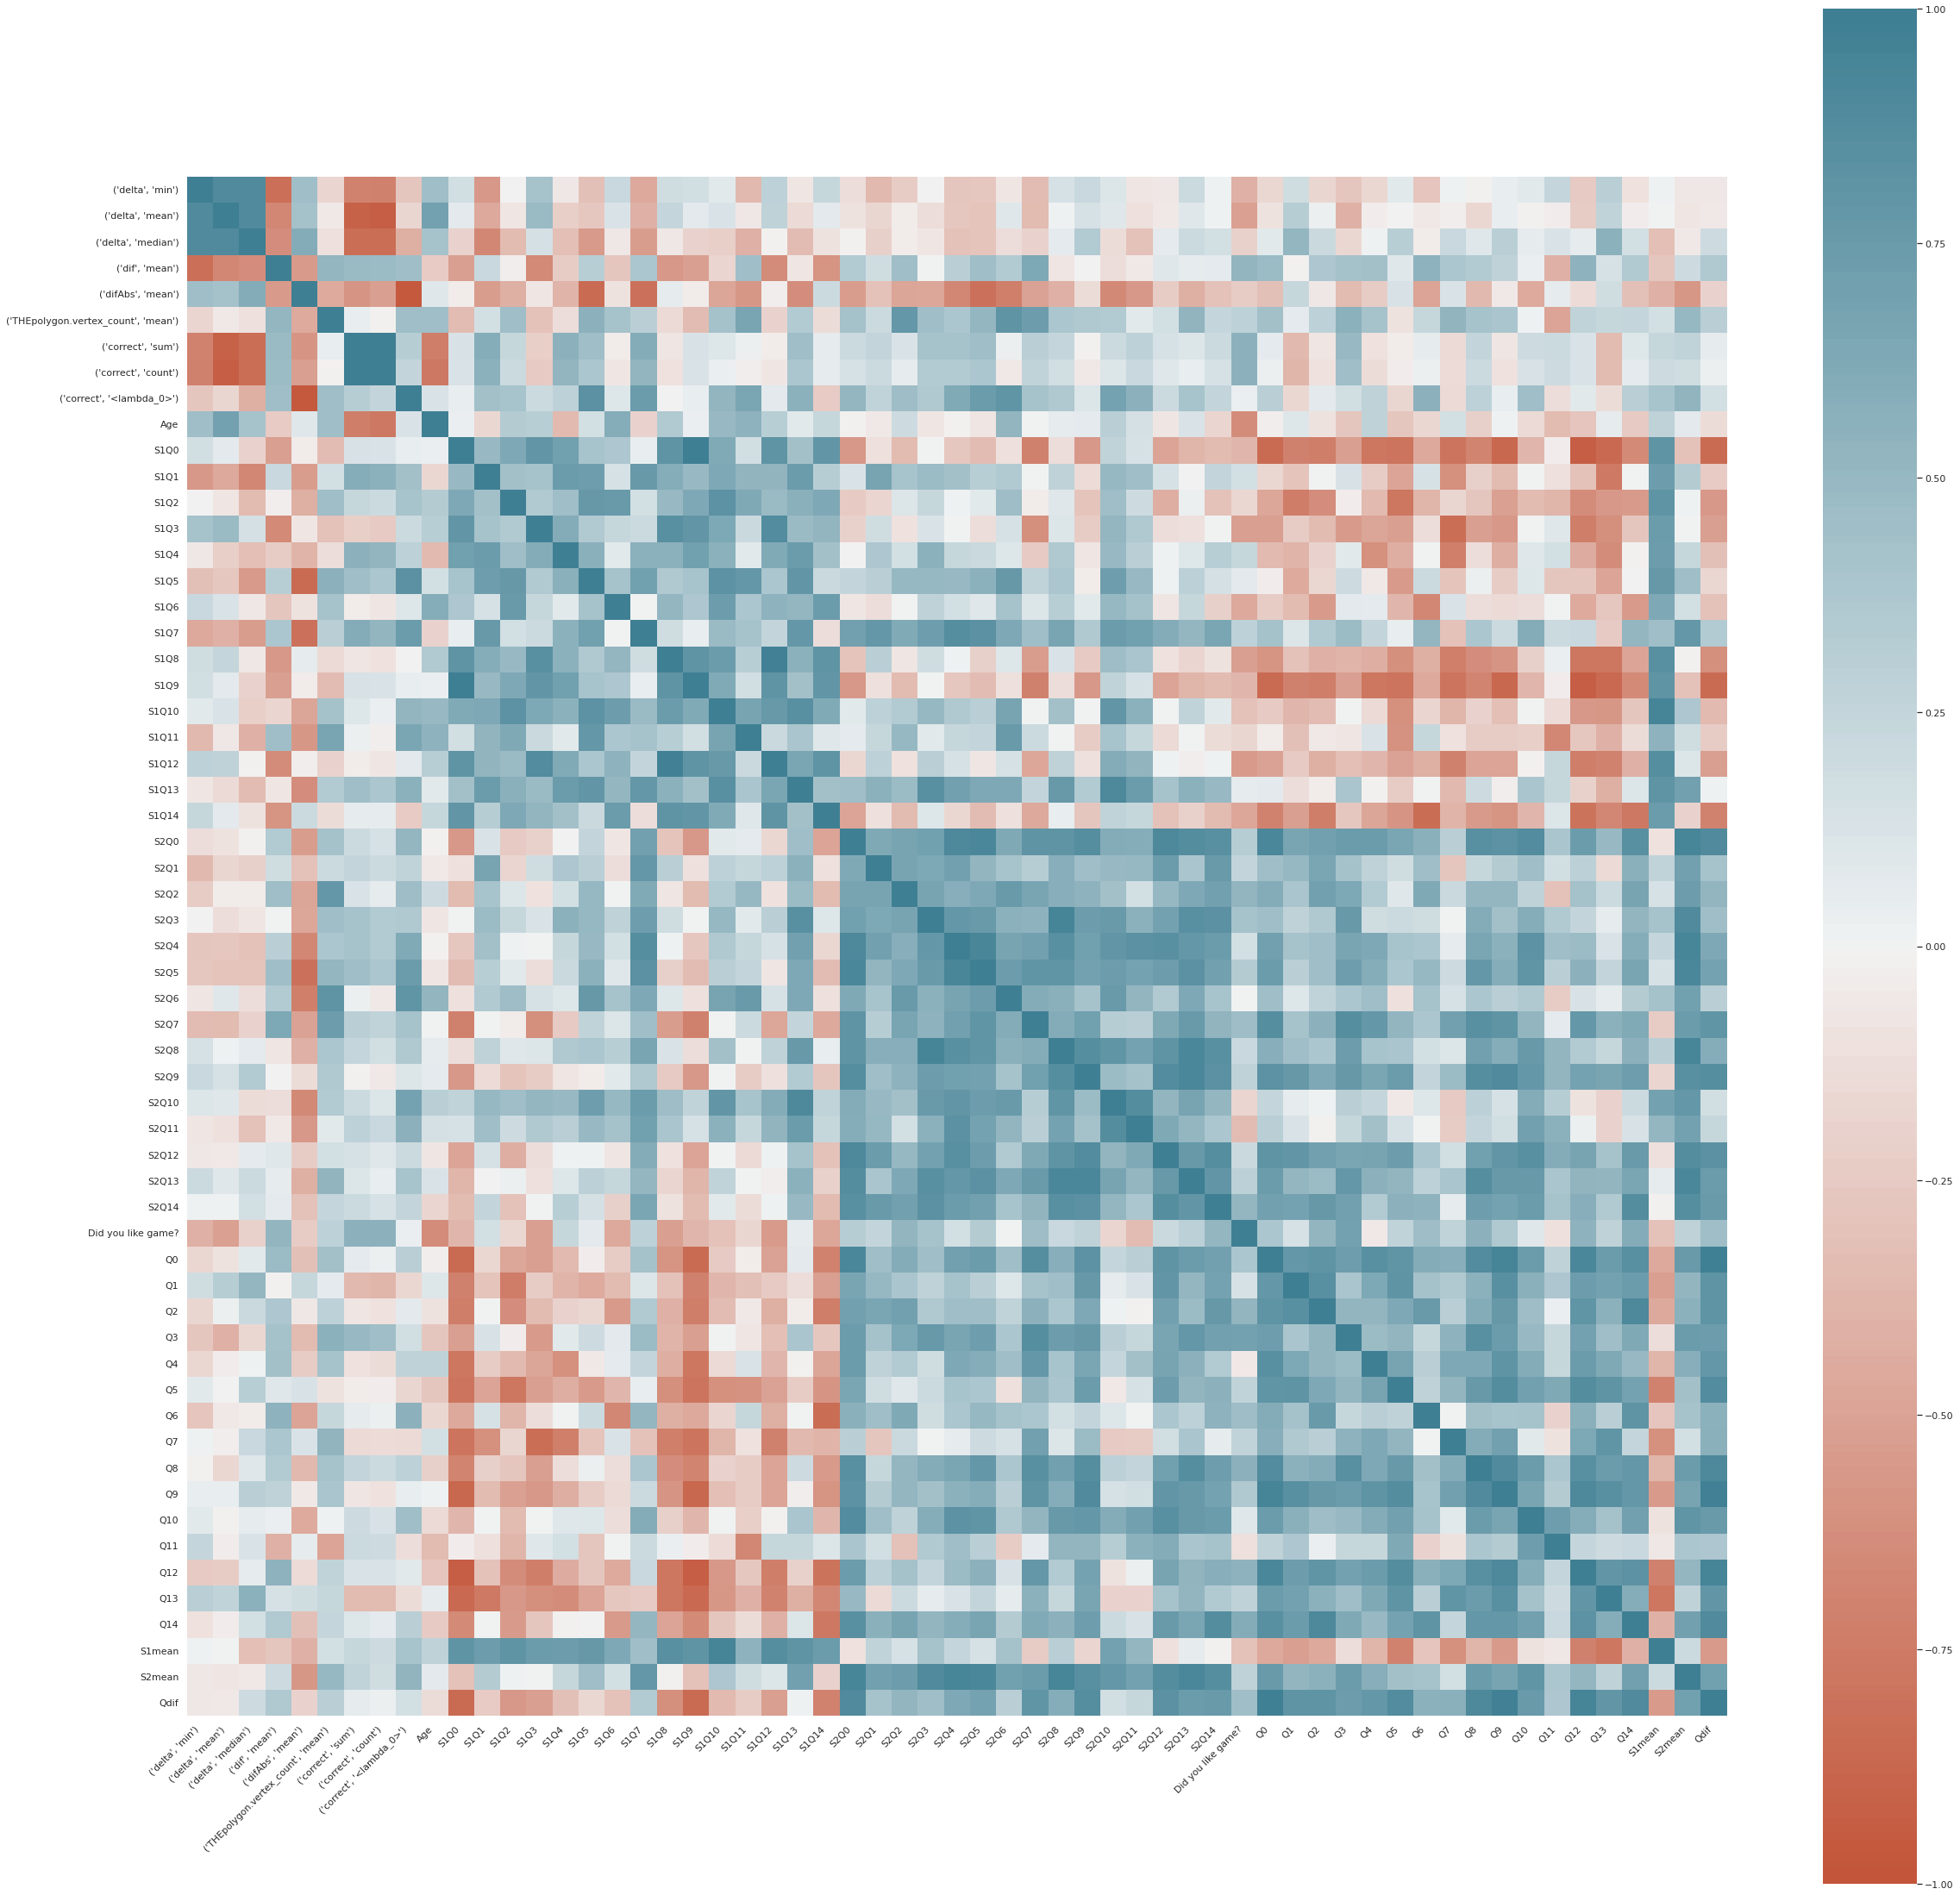

In [38]:
sns.set(rc = {'figure.figsize':(40,40)})

corr = playerStat2.select_dtypes(include='number').corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [39]:
playerStat3 = playerStat.join(Responses[['Player ID','Sex','S1mean','S2mean','S1Q0','S1Q5','S1Q9','Qdif','Q1','Q3','Q6','Q12','Q13']].set_index('Player ID'))
playerStat3

/home/taavi/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:9126: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  return merge(


,"(delta, min)","(delta, mean)","(delta, median)","(dif, mean)","(difAbs, mean)","(THEpolygon.vertex_count, mean)","(correct, sum)","(correct, count)","(correct, <lambda_0>)",Sex,...,S2mean,S1Q0,S1Q5,S1Q9,Qdif,Q1,Q3,Q6,Q12,Q13
gamerID,,,,,,,,,,,,,,,,,,,,,
929230,0.118,4.302502,2.1450,0.004651,0.525581,6.181395,132,215,0.613953,female,...,0.53,1,1,0,-0.20,0,0,1,0,0
1685637,0.106,1.892901,1.5940,-0.077922,0.363636,6.111688,269,385,0.698701,male,...,3.53,1,2,0,2.00,1,2,2,2,0
2189773,0.630,3.343271,2.0010,-0.046110,0.334294,6.337176,248,347,0.714697,female,...,3.13,1,3,0,1.33,0,3,0,1,1
2558195,1.285,12.885322,3.3400,-0.411111,0.588889,6.055556,53,90,0.588889,female,...,1.20,3,1,2,-1.13,0,-1,-2,-3,-1
6092123,0.649,2.733988,2.2320,-0.138554,0.481928,5.972892,210,332,0.632530,female,...,0.87,1,0,0,0.67,0,0,0,1,1
7226659,0.630,2.558207,1.4040,-0.236957,0.380435,6.052174,314,460,0.682609,male,...,1.27,4,3,3,-1.47,-1,0,0,-3,-2
8714568,1.780,16.544250,5.5485,-0.346154,0.576923,6.096154,31,52,0.596154,female,...,2.07,1,0,0,1.47,1,1,1,1,2
9274304,1.037,13.585634,2.9610,-0.146341,0.317073,6.170732,64,82,0.780488,male,...,2.07,2,3,1,0.13,0,-1,2,-1,0


In [40]:
playerStat2.mean(axis=0)

/tmp/ipykernel_36009/3320769741.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  playerStat2.mean(axis=0)


(delta, min)                         0.779375
(delta, mean)                        7.230759
(delta, median)                      2.653187
(dif, mean)                         -0.174812
(difAbs, mean)                       0.446095
(THEpolygon.vertex_count, mean)      6.122221
(correct, sum)                     165.125000
(correct, count)                   245.375000
(correct, <lambda_0>)                0.663503
Age                                 25.875000
S1Q0                                 1.750000
S1Q1                                 1.000000
S1Q2                                 2.375000
S1Q3                                 1.000000
S1Q4                                 1.250000
S1Q5                                 1.625000
S1Q6                                 1.000000
S1Q7                                 1.625000
S1Q8                                 1.750000
S1Q9                                 0.750000
S1Q10                                2.000000
S1Q11                             

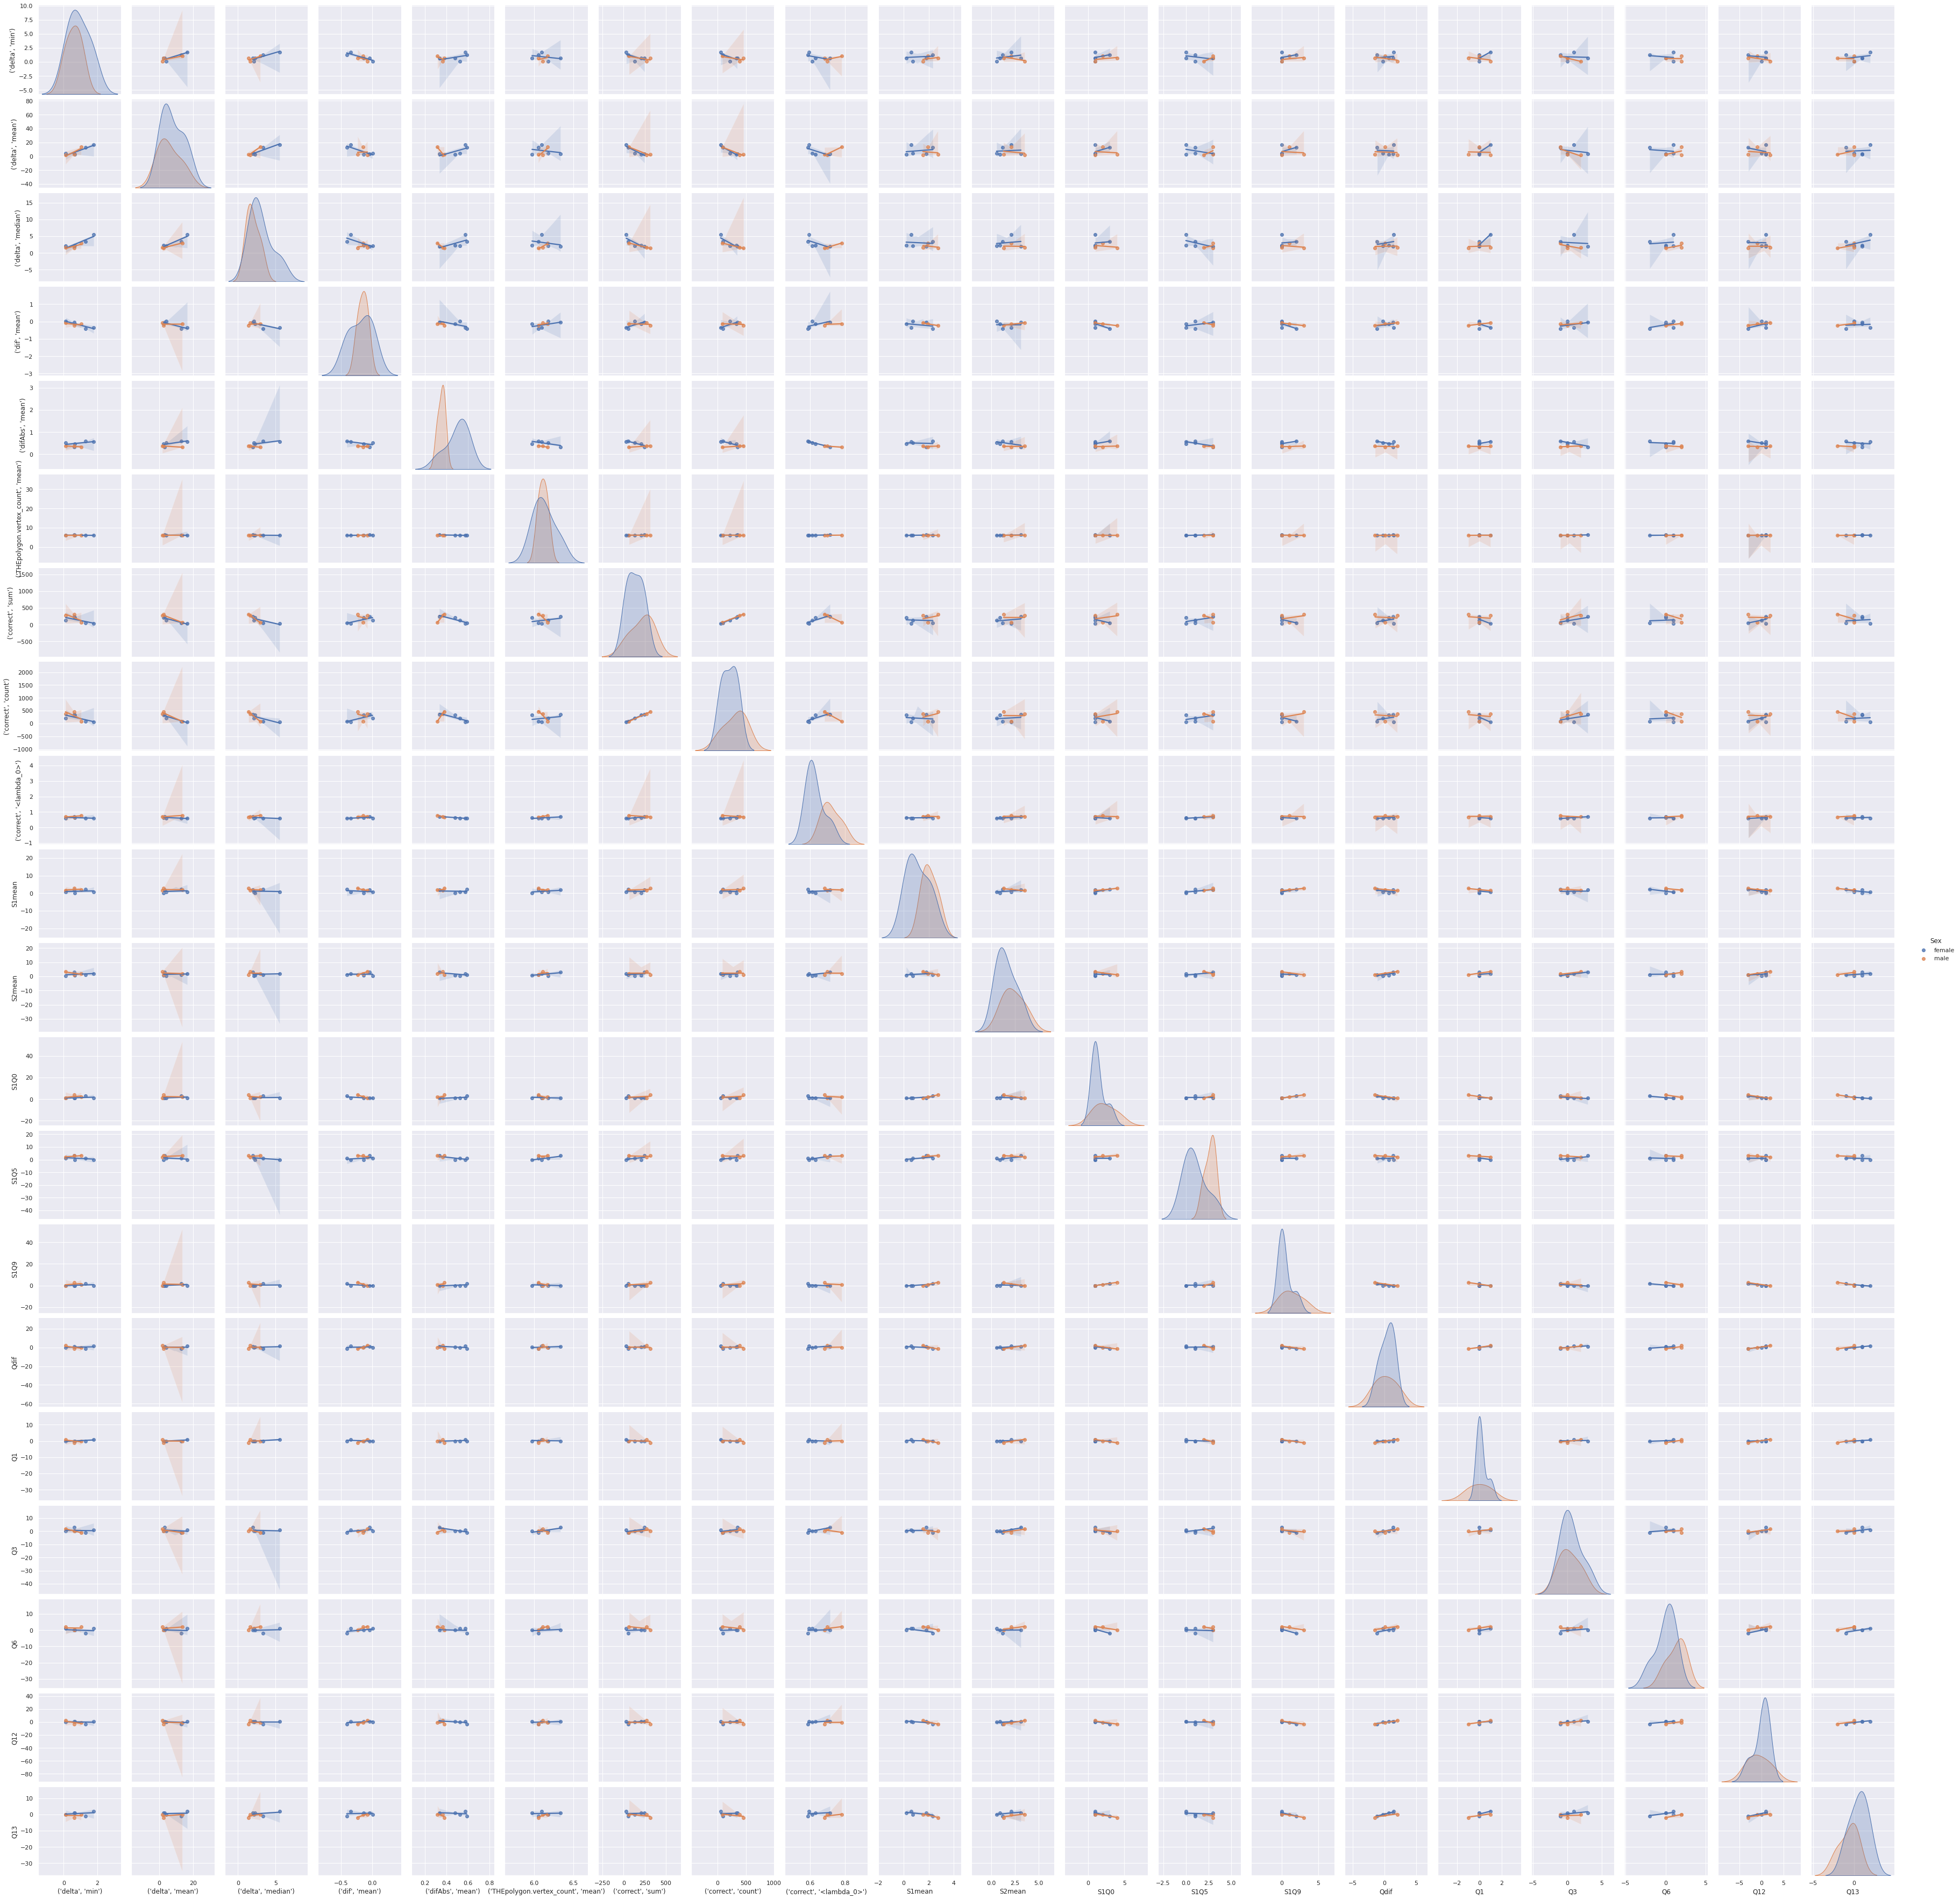

In [41]:
sns.pairplot(playerStat3, kind='reg', hue='Sex') 

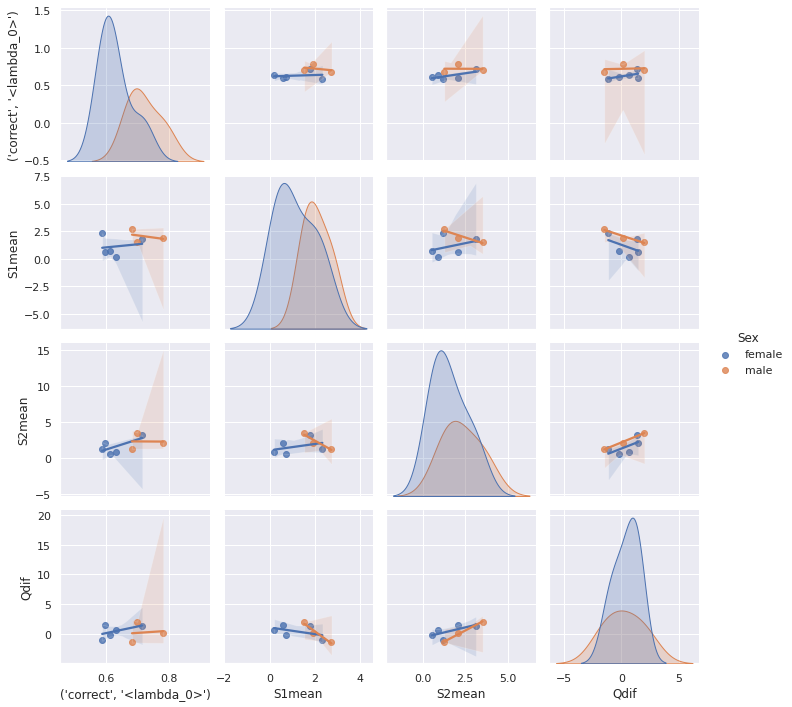

In [42]:
sns.pairplot(playerStat3, vars=[playerStat3.columns[8], 'S1mean', 'S2mean','Qdif'], kind='reg', hue='Sex')

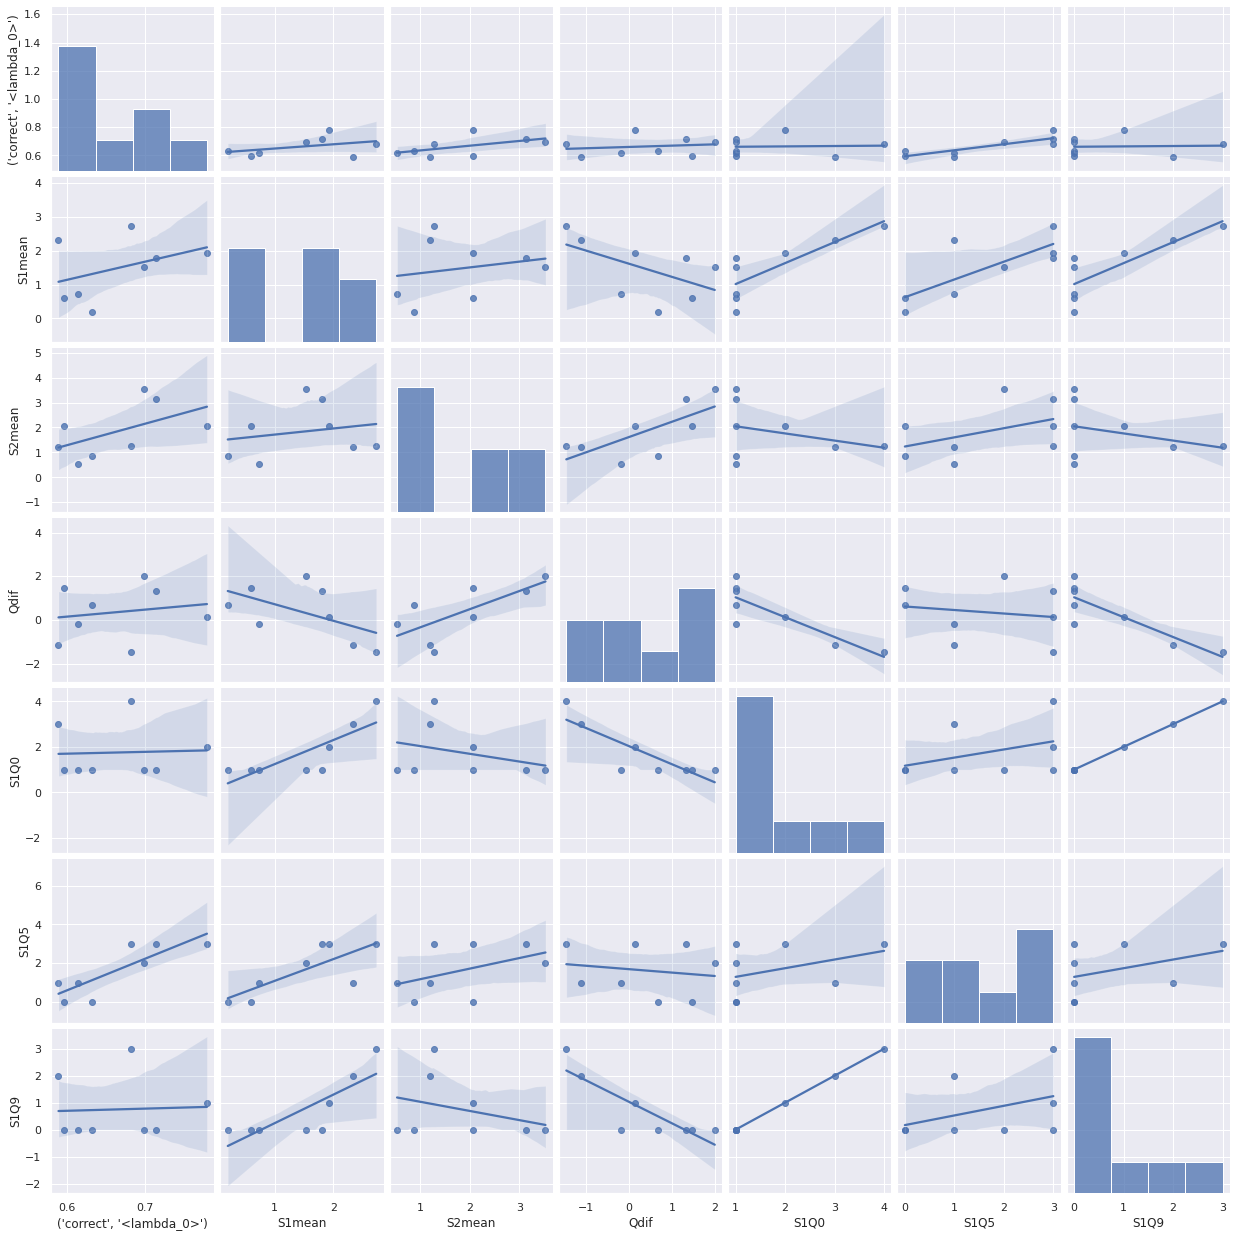

In [43]:
sns.pairplot(playerStat3, vars=[playerStat3.columns[8], 'S1mean', 'S2mean','Qdif','S1Q0','S1Q5','S1Q9'], kind='reg')

In [44]:
playerStat4 = playerStat3[[playerStat3.columns[8],playerStat3.columns[4], 'S1mean', 'S2mean','Qdif','S1Q5']]

/home/taavi/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [45]:
playerStat4.select_dtypes(include='number').mean(axis=0)

(correct, <lambda_0>)    0.663503
(difAbs, mean)           0.446095
S1mean                   1.481250
S2mean                   1.833750
Qdif                     0.350000
S1Q5                     1.625000
dtype: float64

In [46]:
playerStat4 = playerStat4.rename(columns={playerStat4.columns[0]: "percentage of correct answers", playerStat4.columns[1]: "Mean absolute error",
                            playerStat4.columns[2]: "Mindfulness before game",playerStat4.columns[3]: "Mindfulness after game",
                            playerStat4.columns[4]: "Change of mindfulness",playerStat4.columns[5]: "Statment 6 before the game"})

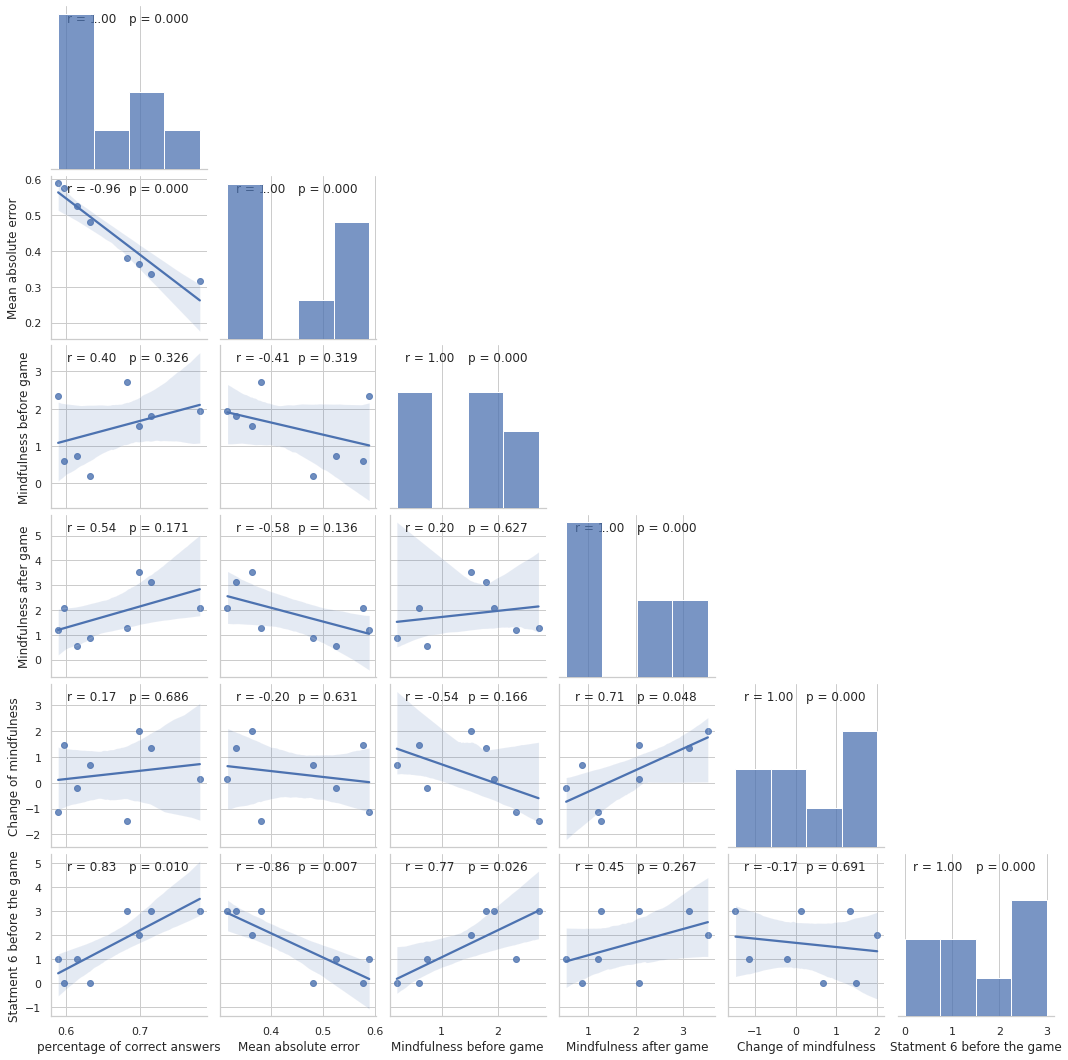

In [47]:
from scipy.stats import pearsonr
sns.set(style='whitegrid')
def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.5, .9), xycoords=ax.transAxes)
graph = sns.pairplot(playerStat4, kind='reg', corner=True)
graph.map(corrfunc)
plt.show()
graph.fig.savefig("Correlation_matrix.png")

# 